# **Stroke Prediction**

Strokes are one of leading causes of death globally. This project uses patients' data to predict whether or they are risk of having a stroke.  

Data was found on Kaggle.com.

## Project Goal
The goal of this project is to apply understand this data and apply machine learning models to assess whether or not we can predict strokes. This is incredibly valuable because strokes a leading cause of death in the world. 

## Data 
The data used was found on Kaggle.com and each row represent one patients and each column a different attribue of the patients. 

## Analysis¶
This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables

## Evaluation
The project will conclude with the evaluation of machine learning models selected with a validation data set. The output of the predictions can be checked through metrics such as accuracy, precision, recall, F1 and Kappa scores.

# Import the relevent python modules

In [ ]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# Load and explore data

In [ ]:
patients = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
patients.head()

In [ ]:
'This data has {} rows and {} columns'.format(patients.shape[0], patients.shape[1])

In [ ]:
list(patients.columns)

# **![](http://)Use matplotlib and seaborn to visualize and better understand our data**

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

The graph bellow indicates that there are more women than men in this data set. 

In [ ]:
plt.figure(figsize = (12, 10))
sns.countplot(data = patients, x = 'gender')
plt.title('Genders of Patients')
plt.show()

The graph below show that while tha ages of the patients in the dataset are quite well distributed there is a concentration of people between the ages of 40 and 60. The average age of people in this data set is 43.

In [ ]:
plt.figure(figsize = (12, 10))
sns.histplot(patients.age, bins = 60)
plt.title('Age of Patients')
plt.show()

In [ ]:
'The average age of patients in this dataset is {}.'.format(round(np.mean(patients.age), 0))

The graph below show that the majortiy of patients in this dataset have been married. 

In [ ]:
plt.figure(figsize =(12, 10))
sns.countplot(data = patients, x = 'ever_married')
plt.title('Marriage Status of Patients')

The graph below shows that the majority of patients in this dataset work in the private sector and that a tiny minority have never worked. 

In [ ]:
plt.figure(figsize = (12, 10))
sns.countplot(data = patients, x = 'work_type')
plt.title('Work Type of Patients')

The graph below shows that the split between patients living in rural area and patients living in urban areas is roughly half - half. 

In [ ]:
plt.figure(figsize = (12, 10))
sns.countplot(data = patients, x = 'Residence_type')
plt.title('Residence Type of Patients')

The graph below shows that the average glucose levels for patients in this dataset is concetrated between 60 and 120 and average is 106. 

In [ ]:
plt.figure(figsize = (12, 10))
sns.histplot(x = patients.avg_glucose_level, hue = patients.gender, binwidth = 5, multiple = 'stack')
plt.title('Average Glucose Level of Patients Broken Down by Gender')

In [ ]:
round((np.mean(patients.avg_glucose_level)), 2)

In [ ]:
plt.figure(figsize = (12, 10))
sns.histplot(x = patients.bmi, hue = patients.gender, binwidth = 5, multiple = 'stack')
plt.title('BMI of Patients Broken Down by Gender')

In [ ]:
round(np.mean(patients.bmi), 0)

The graph below show that there is a greater concentration of patients with in a higher level of glucose in patients above the age of 40. 

In [ ]:
plt.figure(figsize= (12, 10))
plt.scatter(data = patients, x = 'age', y = 'avg_glucose_level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Age vs Average Glucose Level')

The Graph below shows that most patients in this data do not have hypertension

In [ ]:
plt.figure(figsize = (12, 10))
sns.countplot(data = patients, y = 'hypertension', hue = 'gender')
plt.title('Prevelence of Hypertension in Patients Broken Down by Gender')

Text(0.5, 1.0, 'Prevelence of Heart Disease in Patients Broken Down by Gender')

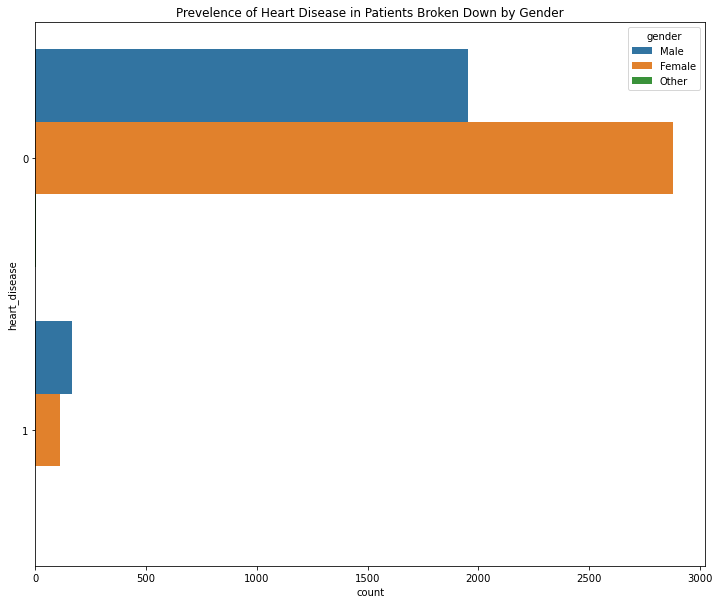

In [98]:
plt.figure(figsize = (12, 10))
sns.countplot(data = patients, y = 'heart_disease', hue = 'gender')
plt.title('Prevelence of Heart Disease in Patients Broken Down by Gender')

The graph below indicates that the number of smokers in men and women is roughly proportional but it appears that a higher proportion of women never smoked. 

Text(0.5, 1.0, 'Smoking Status in Patients Broken Down by Gender')

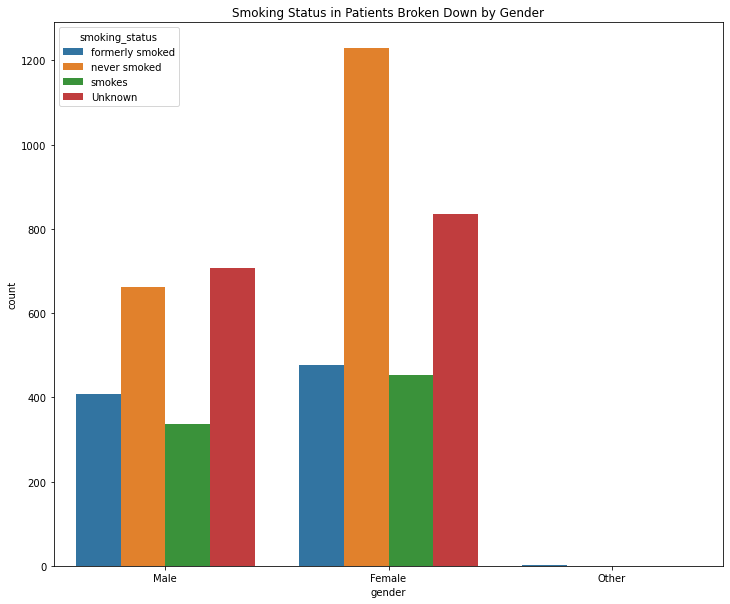

In [99]:
plt.figure(figsize = (12, 10))
sns.countplot(data = patients, x = 'gender', hue = 'smoking_status')
plt.title('Smoking Status in Patients Broken Down by Gender')

The graph below shows the number strokes in the patients dataset. 

Text(0.5, 1.0, 'Prevelence of Hypertension in Patients Broken Down by Gender')

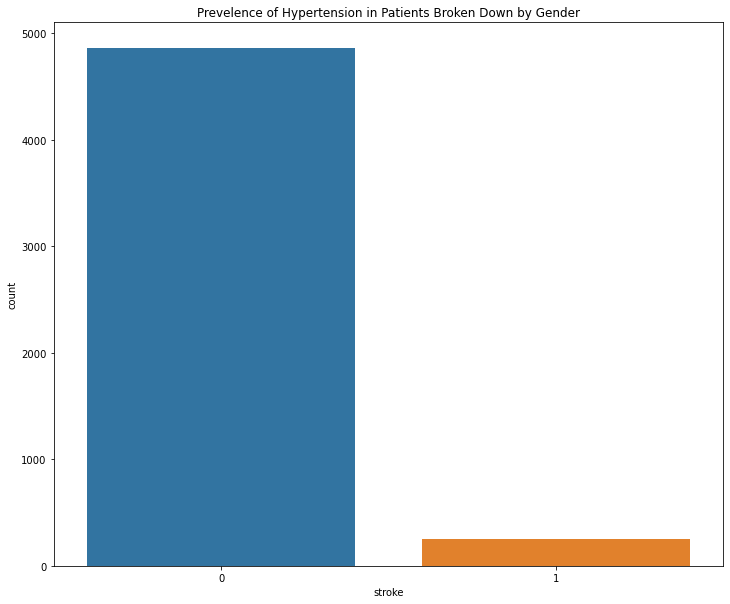

In [100]:
plt.figure(figsize = (12, 10))
sns.countplot(data = patients, x = 'stroke')
plt.title('Prevelence of Hypertension in Patients Broken Down by Gender')

# Process Data to Prepare for Machine Learning

Check for any NaN values

In [101]:
patients.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

Ensure that gender is an integer variable

In [102]:
genders = []

for each in patients.gender:
    if each == 'Male':
        genders.append(0)
    elif each == 'Female':
        genders.append(1)
    else:
        genders.append(2)
        
patients.gender = genders

Replace NaN BMI values with average BMI

In [116]:
patients.bmi = patients.bmi.fillna(np.mean(patients.bmi))

Prepare data for machine learning 

In [117]:
features = patients[['gender', 'age', 'heart_disease', 'avg_glucose_level', 'bmi']]
labels = patients[['stroke']]


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 5)


y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

# Predictions

Import Machine Learning Models and then train and test them

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

Start by training and test a Logistic Regression Model

In [109]:
lr_model = LogisticRegression(multi_class = 'multinomial').fit(x_train, y_train)
lr_predictions = lr_model.predict(x_train)
print(classification_report(y_train, lr_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3891
           1       0.00      0.00      0.00       197

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train)
knn_predictions = knn_model.predict(x_train)
print(classification_report(y_train, knn_predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3891
           1       0.50      0.09      0.15       197

    accuracy                           0.95      4088
   macro avg       0.73      0.54      0.56      4088
weighted avg       0.93      0.95      0.94      4088



In [115]:
dt_model = DecisionTreeClassifier().fit(x_train, y_train)
dt_predictions = dt_model.predict(x_train)
print(classification_report(y_train, dt_predictions))
dt_model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3891
           1       1.00      1.00      1.00       197

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088



0.9041095890410958

# Conclusion 

We tried using 3 machine learning models to predict strokes based off of gender, age, heart_disease, avg_glucose_level, bmi. Logistic regression and KNeighbors didn't work so well by the Decision Tree Classifier accurately predicts strokes. 